In [82]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
np.random.seed(141)

In [83]:
class Sensor:
    def __init__(self,name,cells,coor,radius=50,lifetime=100):
        self.name=name
        self.cells=cells
        self.coor=coor
        self.radius=radius
        self.lifetime=lifetime

In [84]:
width=height=100
sensor_density=0.04
sensing_radius=10
K=[1,2,3]

In [85]:
def getSensorCoordinates():
    sensors=[]
    sensor_side = (1/(sensor_density))**(1/2) 
    int_side=int(sensor_side)
    for i in range(width//int_side):
        for j in range(height//int_side):
            # we do the following to reduce the probability of sensors to be at the corners of the cell
            if(random.random()>0.2):
                temp=[random.randint(1,int_side-1) for _ in range(2)]
            else:
                temp=[random.randint(0,int_side) for _ in range(2)]
            sensor = [int((temp[0]+(sensor_side*i))%width),int((temp[1]+(sensor_side*j))%height)]
            sensors.append(Sensor('S'+str(i)+str(j),[],sensor))
    return sensors

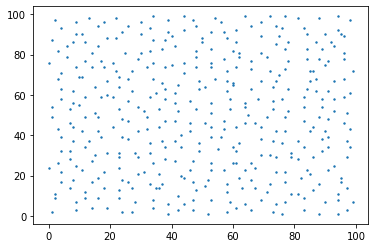

In [86]:
sensors=getSensorCoordinates()
plt.scatter(*zip(*[sensor.coor for sensor in sensors]),s=2)
plt.show()

def create_grids(K,R,sensors):
    cell_x = cell_y =  2*K*R
    grid_sensors=[[[] for j in range(height//cell_y)] for i in range(width//cell_x) ]
    for i in range(width//cell_x): 
        for j in range(height//cell_y): 
            start_x = i * cell_x
            start_y = j * cell_y
            end_x = start_x + cell_x
            end_y = start_y + cell_y
            poi = []
            for sensor in sensors:
                (x,y)=sensor.coor
                if x >= start_x and y >= start_y and x <= end_x and y <= end_y:
                    poi.append(sensor)
            grid_sensors[i][j]=poi
    return grid_sensors
grid_sensors=create_grids(K=K[0],R=sensing_radius,sensors=sensors)

In [87]:
# Number of Grid Cells
num_of_grid_cells = len(grid_sensors)**2
dimen_of_gridcell = width//len(grid_sensors)
print("Num of Grid Cells",num_of_grid_cells)
print("Dimens of Grid Cell",dimen_of_gridcell)

Num of Grid Cells 25
Dimens of Grid Cell 20


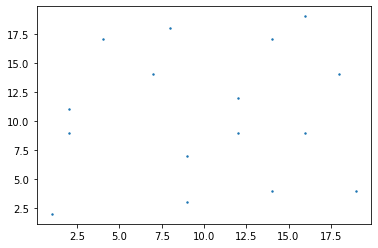

In [88]:
plt.scatter(*zip(*[sensor.coor for sensor in grid_sensors[0][0]]),s=2)

In [89]:
hello = [x for x in grid_sensors[0][0]]
len(grid_sensors[0][0])

16

In [90]:
# for sens in grid_sensors[0][0]:
#     print(sens.name, sens.coor)

In [91]:
mult_factor = 10

In [92]:
def ret_points(centre, grid_cell, R):
    x,y = centre
    points = []
    temp = 1
    
    max_index = len(grid_cell) - 1
    
    deg = 180
    for i in range(y,y-R-1,-1*temp): 
        if i<0 or i>max_index:
            continue

        x_min = round(x + R * math.cos(deg*math.pi/180))
        for j in range(x,x_min,-1*temp): 
            if j<0 or j>max_index:
                continue

            if grid_cell[j][i] == 1:
                points.append([j,i])
            else:
                break
        deg-=90.0/R

    deg = 0
    for i in range(y,y-R-1,-1*temp):
        if i<0 or i>max_index:
            continue

        x_min = round(x + R * math.cos(deg*math.pi/180))
        for j in range(x,x_min,1*temp):
            if j<0 or j>max_index:
                continue

            if grid_cell[j][i] == 1:
                points.append([j,i])
            else:
                break
        deg+=90.0/R
    

    deg = 180
    for i in range(y,y+R+1,1*temp):
        if i<0 or i>max_index:
            continue

        x_min = round(x + R * math.cos(deg*math.pi/180))
        for j in range(x,x_min,-1*temp):
            if j<0 or j>max_index:
                continue

            if grid_cell[j][i] == 1:
                points.append([j,i])
            else:
                break
        deg+=90.0/R

    deg = 360
    for i in range(y,y+R+1,1*temp):
        if i<0 or i>max_index:
            continue

        x_min = round(x + R * math.cos(deg*math.pi/180))
        for j in range(x,x_min,1*temp):
            if j<0 or j>max_index:
                continue

            if grid_cell[j][i] == 1:
                points.append([j,i])
            else:
                break
        deg+=90.0/R
    return points   

In [ ]:
R = sensing_radius*mult_factor
cover_perc = 0.03

max_val = 0
max_sensor = None

coverset_dict = {}
le = len(grid_sensors)
for i in range(le):
    for j in range(le):
        print('Doing',i,j,'......')
        grid_cell = np.ones((dimen_of_gridcell*mult_factor,dimen_of_gridcell*mult_factor)) # 200 x 200
        all_cover_sets = []
        cover_sets = []
        while len(grid_sensors[i][j])>0:
            max_val = 0
            for sens in grid_sensors[i][j]: 
                x = (sens.coor[0]-i*dimen_of_gridcell)*mult_factor
                y = (sens.coor[1]-j*dimen_of_gridcell)*mult_factor
                x = x if x<len(grid_cell) else len(grid_cell)-1
                y = y if y<len(grid_cell) else len(grid_cell)-1

                sens.cells = ret_points((x,y),grid_cell, R)

                if len(sens.cells) > max_val:
                    max_val = len(sens.cells)
                    max_sensor = sens

            for x,y in max_sensor.cells:
                grid_cell[x][y] = 0
            if max_val <= 0 or np.count_nonzero(grid_cell == 1) < int(cover_perc*(len(grid_cell)**2)):
                if np.count_nonzero(grid_cell == 1) < int(cover_perc*(len(grid_cell)**2)):
                    all_cover_sets.append(cover_sets)
                cover_sets = []
                grid_cell = np.ones((dimen_of_gridcell*mult_factor,dimen_of_gridcell*mult_factor))
                continue
            cover_sets.append(max_sensor)
            grid_sensors[i][j].remove(max_sensor)
        coverset_dict[(i,j)] = all_cover_sets
        

Doing 0 0 ......
Doing 0 1 ......
Doing 0 2 ......
Doing 0 3 ......
Doing 0 4 ......
Doing 1 0 ......


In [ ]:
for key,value in coverset_dict.items():
    print(key)
    for x in value:
        for sens in x:
            print(sens.name,end=" ")
        print()
    print()